## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

## Load the Aggregated data

In [2]:
merged_df = pd.read_csv("../../clean_data/FinalData_for_Models.csv", index_col=0)

In [3]:
merged_df.head()

,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday
2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True
2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True
2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True
2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True
2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True


In [4]:
merged_df.index = pd.DatetimeIndex(merged_df.index).tz_localize("UTC").tz_convert("EST")

In [5]:
merged_df.head()

,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,Passengers,Month,Hour,Day,holiday
2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,sky is clear,108.0,1,0,2,True
2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,sky is clear,0.0,1,1,2,True
2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,sky is clear,0.0,1,2,2,True
2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,sky is clear,0.0,1,3,2,True
2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,sky is clear,0.0,1,4,2,True


In [12]:
df = merged_df.groupby(["weather_main", "weather_description"]).agg({"num_pickups": "mean", "num_passengers": "mean"})

In [18]:
rain_df = df.loc["rain"]

In [19]:
rain_df

,num_pickups,num_passengers
weather_description,,
freezing rain,565.700000,987.300000
heavy intensity rain,351.856716,604.823353
light rain,415.359517,718.891282
moderate rain,372.877210,645.626614


In [24]:
rain_df.index

Index(['freezing rain', 'heavy intensity rain', 'light rain', 'moderate rain'], dtype='object', name='weather_description')

In [32]:
rain_df["num_passengers"]

weather_description
freezing rain           987.300000
heavy intensity rain    604.823353
light rain              718.891282
moderate rain           645.626614
Name: num_passengers, dtype: float64

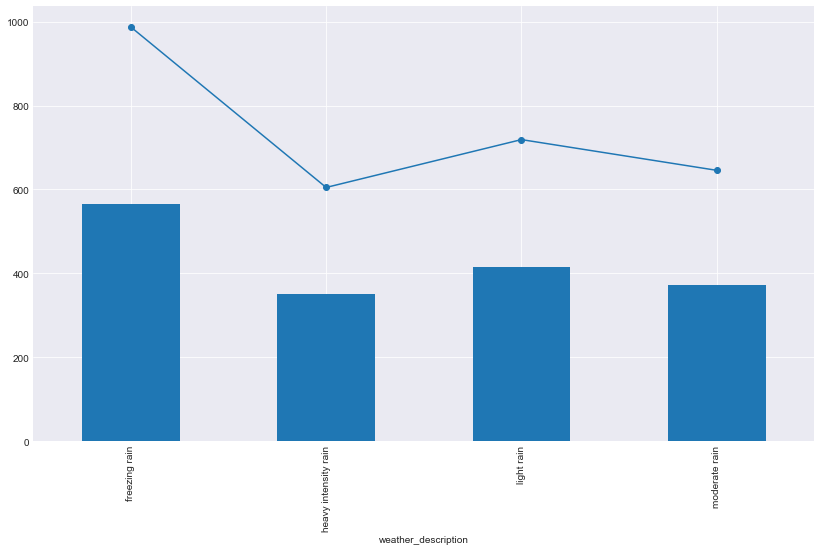

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
rain_df.num_pickups.plot(kind="bar", ax = ax)
ax.plot(range(4), rain_df["num_passengers"], marker = "o")

# plt.xticks(check.index, check["weather_description"])
# plt.xlabel("Rain Weather Types")
# plt.ylabel("Number of Passengers")
# plt.title("Effect of Rainy Weather on Average Taxi Pickups and Average Passenger Count per Hour")
# plt.legend()
# plt.show()

# sns.barplot(x = "weather_description", y = "pickup_count", data=check)


In [35]:
snow_df = df.loc["snow"]

In [36]:
snow_df

,num_pickups,num_passengers
weather_description,,
heavy snow,112.066667,188.333333
light snow,311.690949,539.596882
snow,266.750000,471.797753


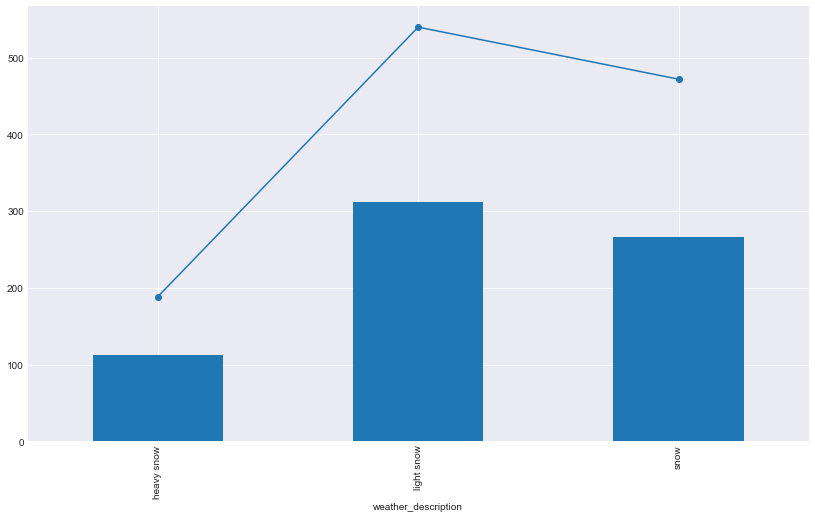

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
snow_df.num_pickups.plot(kind="bar", ax = ax)
ax.plot(range(3), snow_df["num_passengers"], marker = "o")

In [39]:
thunder_df = df.loc["thunderstorm"]

In [40]:
thunder_df

,num_pickups,num_passengers
weather_description,,
proximity thunderstorm,372.115942,651.200000
thunderstorm,410.473958,706.460733


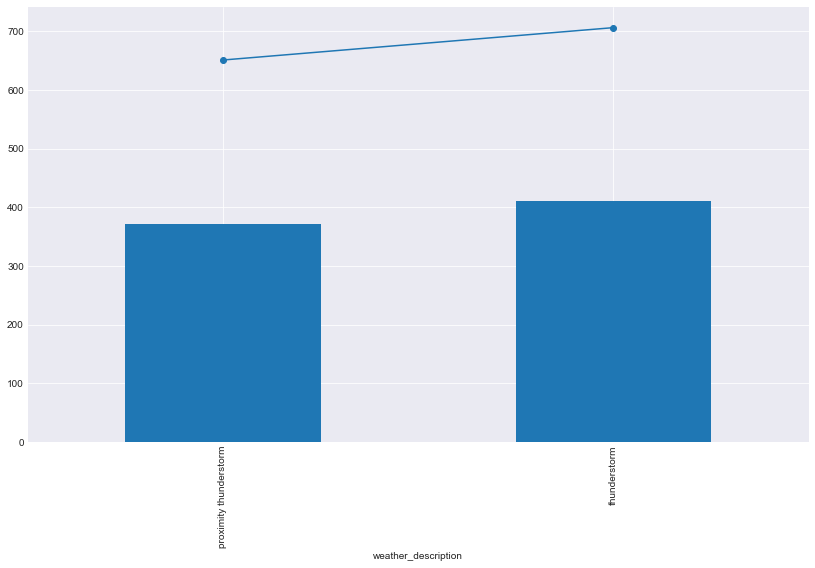

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
thunder_df.num_pickups.plot(kind="bar", ax = ax)
ax.plot(range(2), thunder_df["num_passengers"], marker = "o")